In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
df = sns.load_dataset('penguins')
df = df.sample(frac=0.33, random_state=1) # get a fraction of the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
291,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,Male


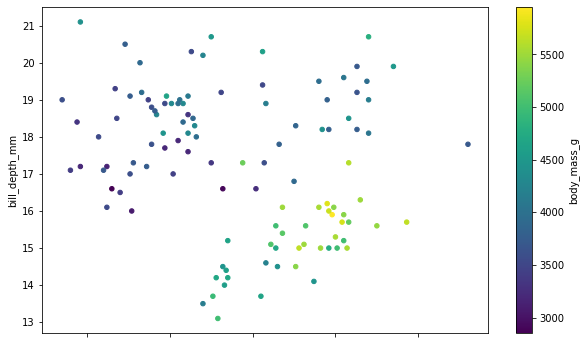

In [3]:
df.plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm', c='body_mass_g',
        figsize=(10,6),colormap='viridis')
plt.show()

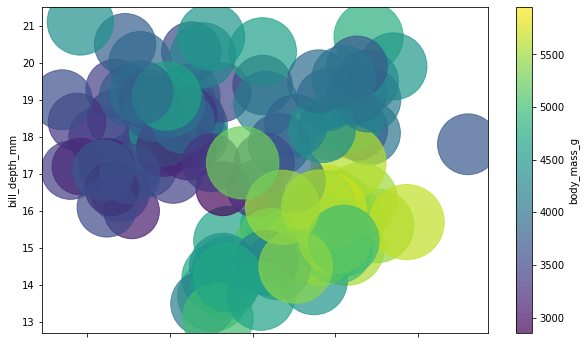

In [4]:
df.plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',
         c='body_mass_g',
        s=df['body_mass_g'],
        figsize=(10,6),
        colormap='viridis',
        alpha=0.7)
plt.show()

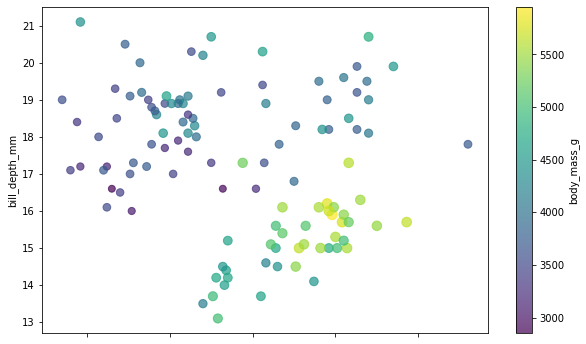

In [5]:
df.plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',
         c='body_mass_g',
        s=df['body_mass_g']/60,  ### factor by 60
        figsize=(10,6),
        colormap='viridis',
        alpha=0.7)
plt.show()

In [6]:
df_practice = sns.load_dataset('tips')
df_practice = df_practice.head(50)
df_practice.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


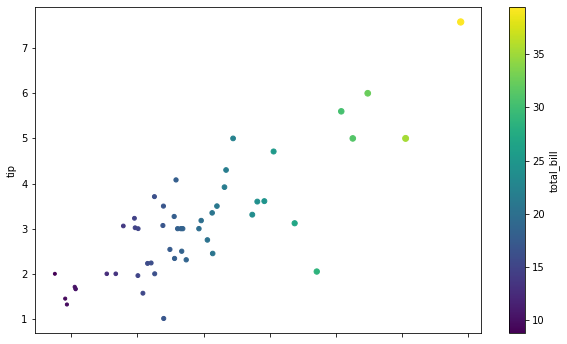

In [7]:
df_practice.plot(kind='scatter',x='total_bill',y='tip',
         c='total_bill',
        s=df_practice['total_bill'],
        figsize=(10,6),
        colormap='viridis'
                )
plt.show()


In [8]:
df = pd.DataFrame(data={'Revenue': [300, 350, 500, 250, 250, 350, 400],
                        'Margin': [150, 200, 400, 50, 180, 180, 200],
                        'Volume': [26, 30, 40, 15, 15, 30, 25],},
                  index=pd.date_range(start='2021/05/01',freq='D',periods=7))
df

,Revenue,Margin,Volume
2021-05-01,300,150,26
2021-05-02,350,200,30
2021-05-03,500,400,40
2021-05-04,250,50,15
2021-05-05,250,180,15
2021-05-06,350,180,30
2021-05-07,400,200,25


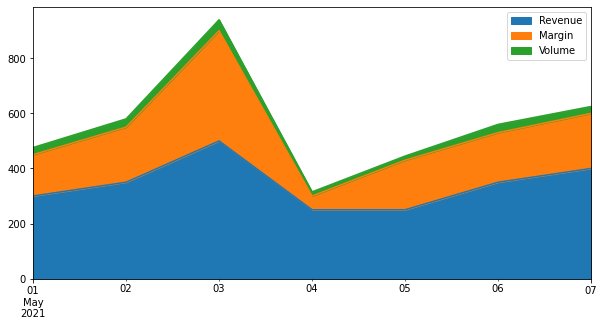

In [9]:
df.plot(kind='area', y=['Revenue','Margin', 'Volume'],figsize=(10,5))
plt.show()

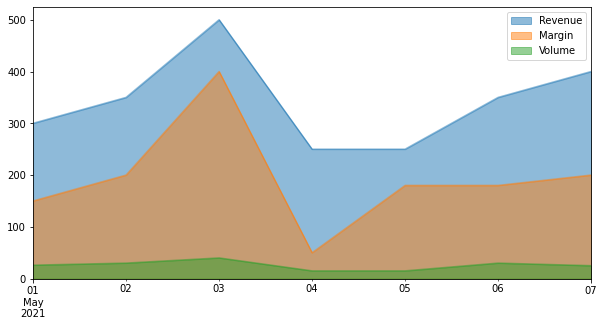

In [10]:
df.plot(kind='area', y=['Revenue','Margin', 'Volume'],figsize=(10,5),stacked=False)
plt.show()

In [11]:
df_practice
data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[160,20,280,50,100,67,300,200]}

df_practice = pd.DataFrame(data)
df_practice

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,160
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


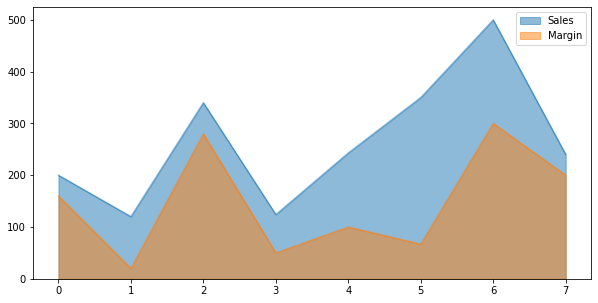

In [12]:
df_practice.plot(kind='area', y=['Sales','Margin'],figsize=(10,5), stacked=False)
plt.show()

In [13]:
df = sns.load_dataset('penguins')
df = df.sample(frac=0.1, random_state=1) # get a fraction of the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
306,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
291,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
289,Gentoo,Biscoe,50.7,15.0,223.0,5550.0,Male


In [14]:
df.value_counts('species')

species
Adelie       15
Gentoo       14
Chinstrap     5
dtype: int64

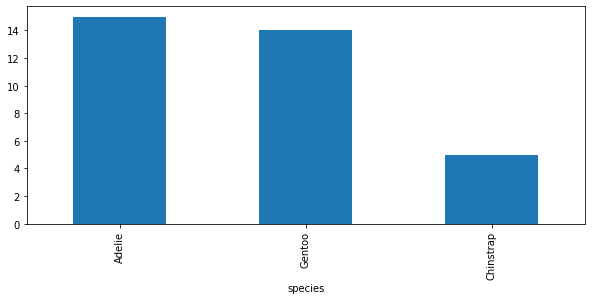

In [15]:
df.value_counts('species').plot(kind='bar',figsize=(10,4))
plt.show()

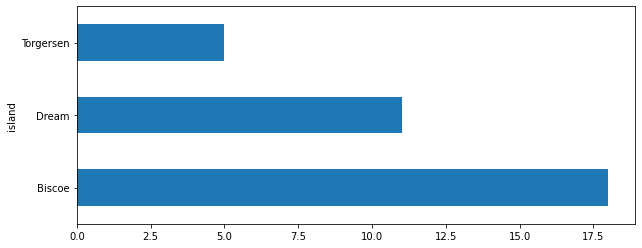

In [16]:
df.value_counts('island').plot(kind='barh',figsize=(10,4))
plt.show()

* species bar plot


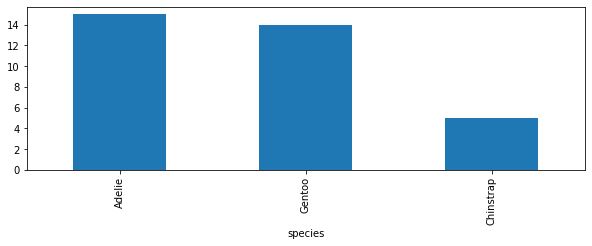




* island bar plot


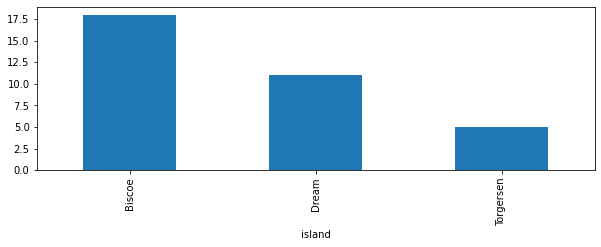




* sex bar plot


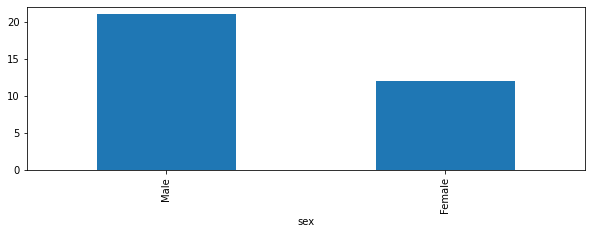

In [17]:
for col in df.select_dtypes(include='object').columns:
  df.value_counts(col).plot(kind='bar',figsize=(10,3))
  print(f"* {col} bar plot")
  plt.show()
  print("\n\n")

In [18]:
df.groupby(['island','species']).size().unstack()

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,4.0,NaN,14.0
Dream,6.0,5.0,NaN
Torgersen,5.0,NaN,NaN


* species bar plot - stacked by island


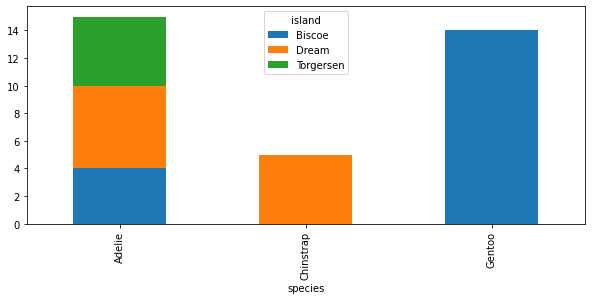




* species bar plot - stacked by sex


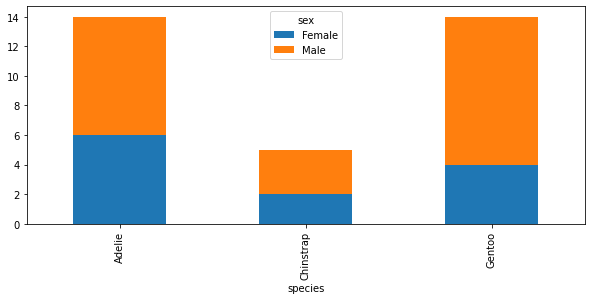




* island bar plot - stacked by sex


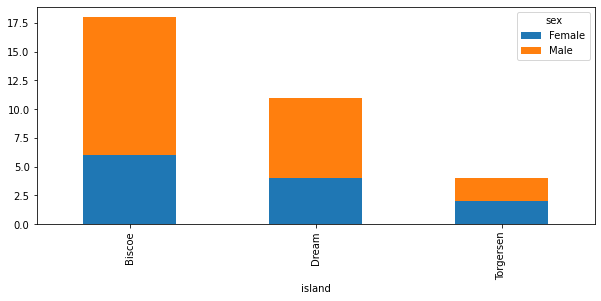

In [19]:
from itertools import combinations

for col1,col2 in combinations(df.select_dtypes(include='object').columns,2):
    print(f"* {col1} bar plot - stacked by {col2}")
    df.groupby([col1,col2]).size().unstack().plot(kind='bar', stacked=True,figsize=(10,4))
    plt.show()
    print('\n\n')


In [20]:
df_practice = sns.load_dataset('tips')
df_practice = df_practice.head(50)
df_practice.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


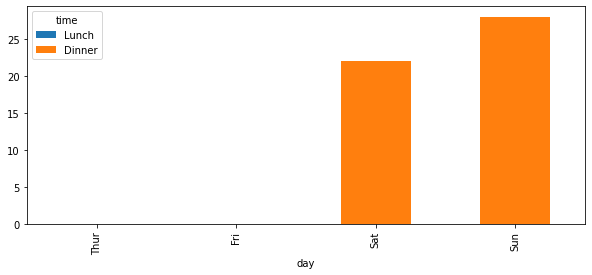

In [21]:
df_practice.groupby(['day','time']).size().unstack().plot(kind='bar', stacked=True,figsize=(10,4))
plt.show()


In [25]:
df = sns.load_dataset('penguins')
df = df.head(50)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
df.value_counts('sex',normalize=True)

sex
Female    0.5
Male      0.5
dtype: float64

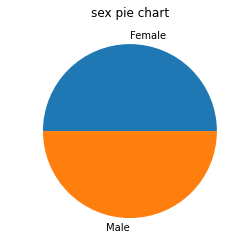

In [27]:
df.value_counts('sex',normalize=True).plot(kind='pie', ylabel=' ', title='sex pie chart')
plt.show()

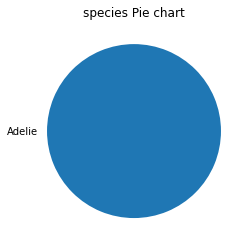

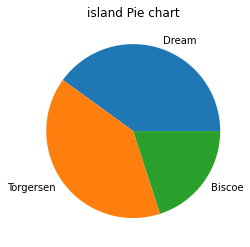

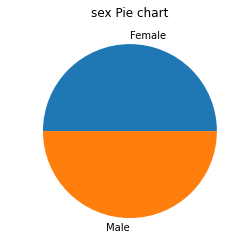

In [28]:
for col in df.select_dtypes(include='object').columns:
  df.value_counts(col,normalize=True).plot(kind='pie',ylabel=' ', title=f"{col} Pie chart")
  plt.show()
  print("\n\n")

In [29]:
df_practice = sns.load_dataset('tips')
# there are some variables with data type of 'category', we replace for 'object
for col in df_practice.select_dtypes(include='category'):
  df_practice[col] = df_practice[col].astype('object')

df_practice.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


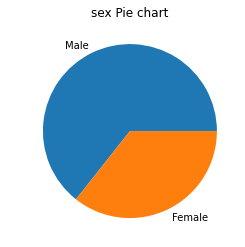

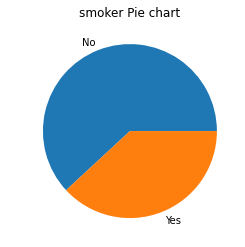

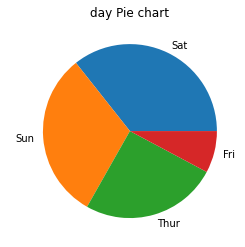

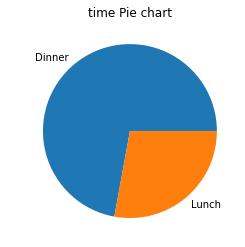

In [30]:
for col in df_practice.select_dtypes(include='object').columns:
  df_practice.value_counts(col,normalize=True).plot(kind='pie',ylabel=' ', title=f"{col} Pie chart")
  plt.show()
  print("\n\n")